In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from pandas.plotting import scatter_matrix

In [3]:
# Load dataset
dataset = pd.read_csv('phone price classification.csv')
print(dataset.head(10))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20  

In [4]:
print("\nColumns:", dataset.columns)


Columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
print("\nShape:", dataset.shape)


Shape: (2000, 21)


In [6]:
print("\nInfo:")
print(dataset.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  t

In [7]:
# Check for missing values and duplicates
print("\nMissing values in each column:")
print(dataset.isnull().sum())

print("\nDuplicates in dataset:")
print(dataset.duplicated().sum())


Missing values in each column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Duplicates in dataset:
0


In [8]:
# Check data types and unique values
print("\nData types and unique values:")
for feature in dataset.columns:
    print(f"\n{feature}:")
    print(dataset[feature].unique())


Data types and unique values:

battery_power:
[ 842 1021  563 ... 1139 1467  858]

blue:
[0 1]

clock_speed:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

dual_sim:
[0 1]

fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

four_g:
[0 1]

int_memory:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 12

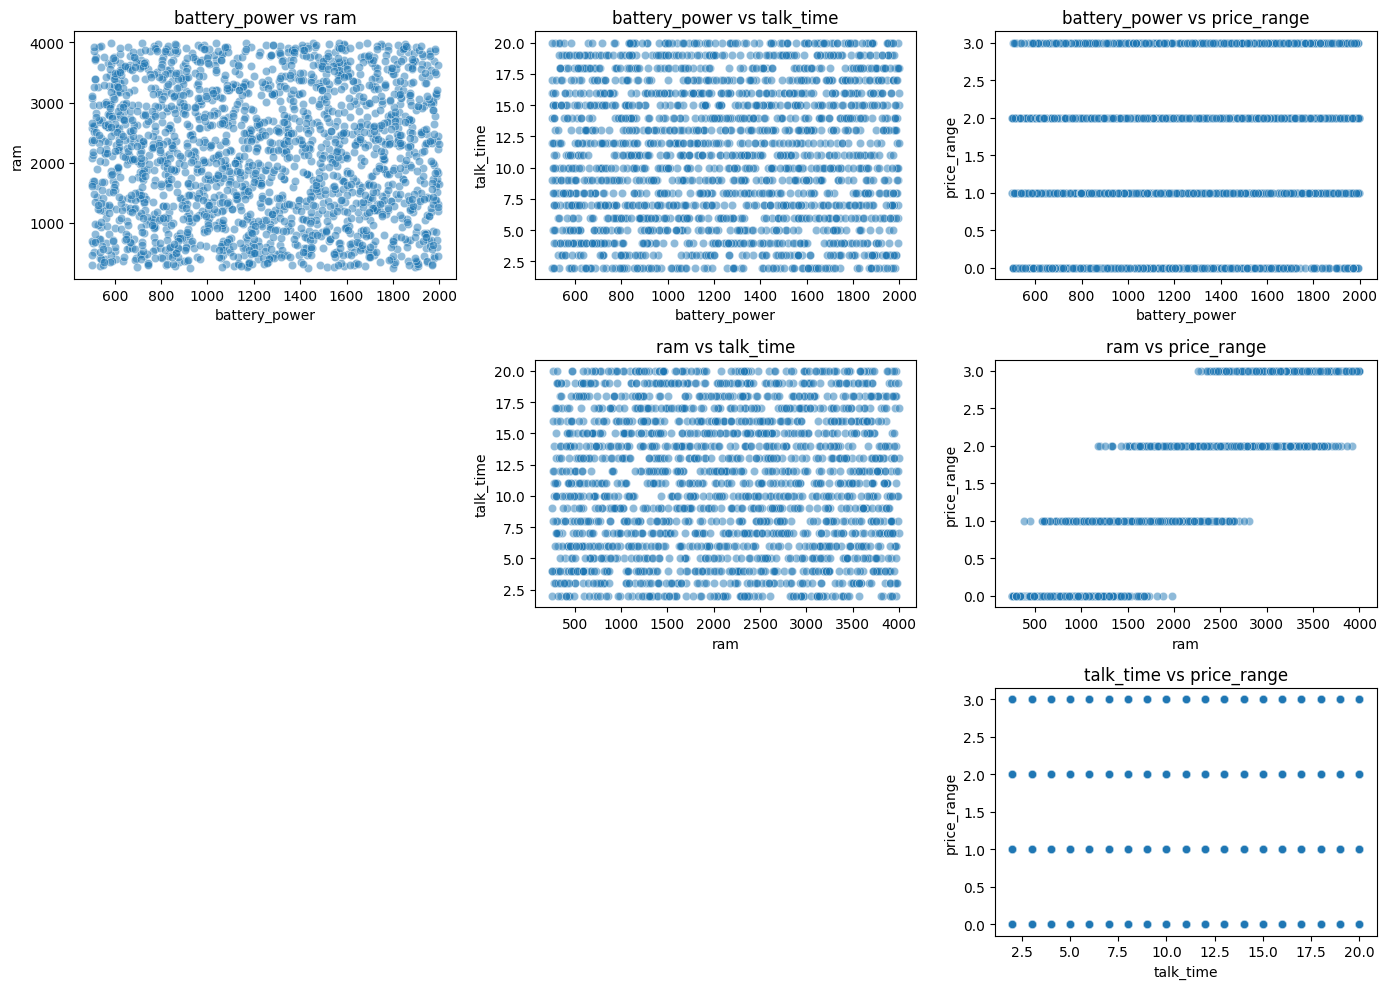

In [10]:
# Scatter plots for selected pairs of features
important_features = ['battery_power', 'ram', 'talk_time', 'price_range']  
plt.figure(figsize=(14, 10))

for i, feature1 in enumerate(important_features):
    for j, feature2 in enumerate(important_features):
        if i < j:
            plt.subplot(len(important_features)-1, len(important_features)-1, i*(len(important_features)-1) + j)
            sns.scatterplot(x=dataset[feature1], y=dataset[feature2], alpha=0.5)
            plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()

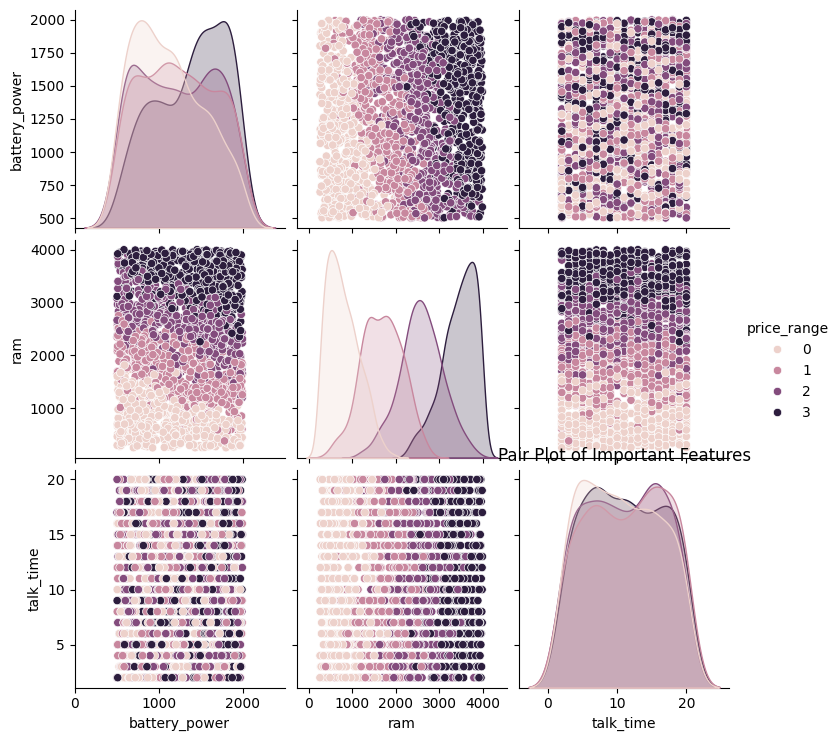

In [11]:
# Pair plot for a subset of important features
sns.pairplot(dataset[important_features], hue='price_range')
plt.title('Pair Plot of Important Features')
plt.show()

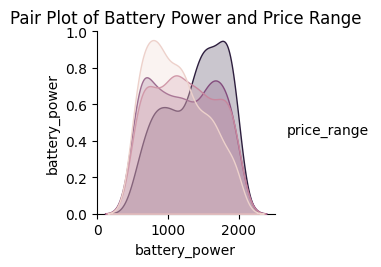

In [13]:
# Pair plot for price_range and battery_power
sns.pairplot(dataset[['battery_power', 'price_range']], hue='price_range')
plt.title('Pair Plot of Battery Power and Price Range')
plt.show()


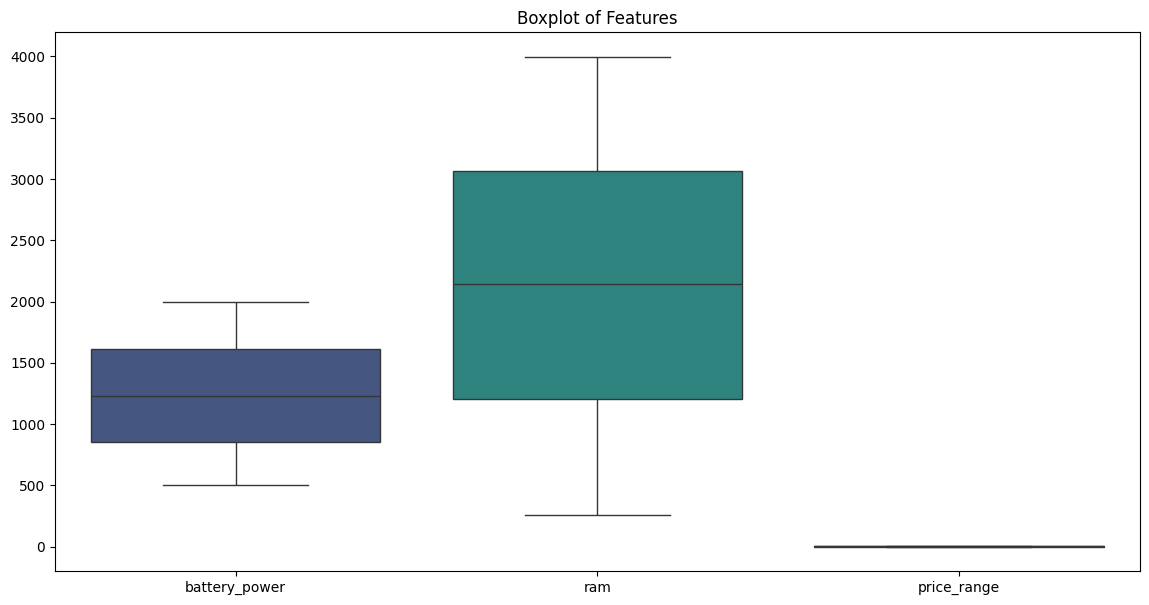

In [14]:
# Boxplot for feature distributions
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataset[['battery_power', 'ram', 'price_range']], palette='viridis')
plt.title('Boxplot of Features')
plt.show()

C:\Users\Elkhlawy\AppData\Local\Temp\ipykernel_23588\3373392349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='ram', data=avg_ram, palette='viridis')


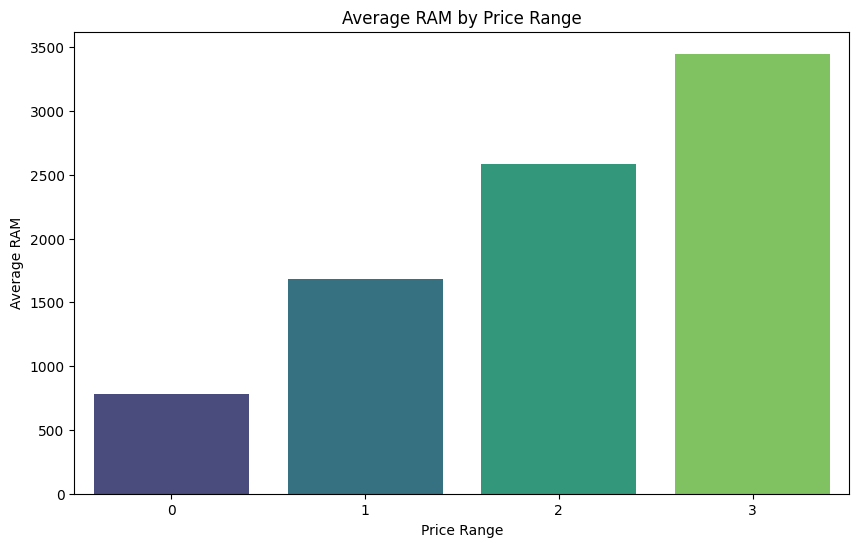

In [16]:
# Bar plot for average RAM by price range
plt.figure(figsize=(10, 6))
avg_ram = dataset.groupby('price_range')['ram'].mean().reset_index()
sns.barplot(x='price_range', y='ram', data=avg_ram, palette='viridis')
plt.title('Average RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average RAM')
plt.show()

C:\Users\Elkhlawy\AppData\Local\Temp\ipykernel_23588\2707324029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='battery_power', data=avg_battery_power, palette='viridis')


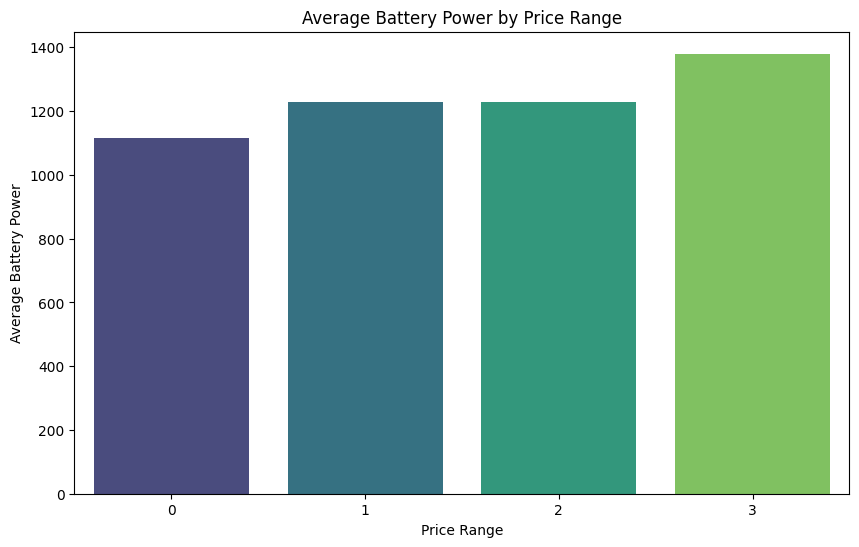

In [17]:
# Bar plot for average battery power by price range
plt.figure(figsize=(10, 6))
avg_battery_power = dataset.groupby('price_range')['battery_power'].mean().reset_index()
sns.barplot(x='price_range', y='battery_power', data=avg_battery_power, palette='viridis')
plt.title('Average Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Battery Power')
plt.show()

In [18]:
# Prepare data
X = dataset.drop('price_range', axis=1)
y = dataset['price_range']
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2000, 20)
Shape of y: (2000,)


In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print('\nRandomForestRegressor Training Score:', RF.score(X_train, y_train))
print('RandomForestRegressor Testing Score:', RF.score(X_test, y_test))

print('Sample Predictions:', y_pred_RF[:10])
print('Actual Values:', y_test.values[:10])


RandomForestRegressor Training Score: 0.9547299517970474
RandomForestRegressor Testing Score: 0.9297646483674208
Sample Predictions: [0.06861933 1.79927629 1.01355624 2.9516235  1.02904261 1.26712581
 1.90149142 0.07500303 2.32847857 1.21245296]
Actual Values: [0 2 1 3 1 1 2 0 3 1]


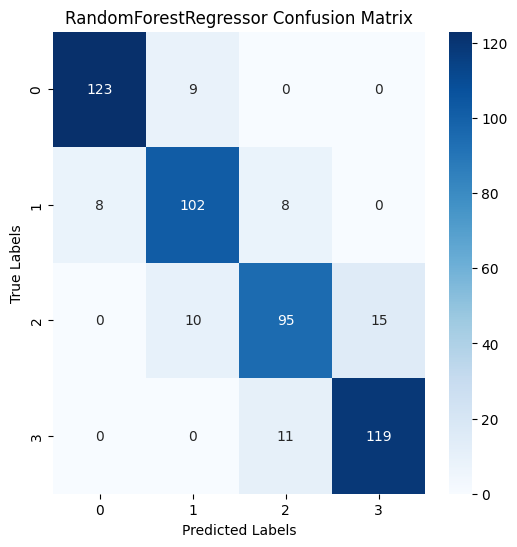

In [22]:
# RandomForest Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, np.round(y_pred_RF))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForestRegressor Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
#  metrics for evaluation
print('\nRandomForestRegressor Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_RF))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_RF))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred_RF))


RandomForestRegressor Metrics:
Mean Absolute Error: 0.19884416575871205
Mean Squared Error: 0.09116436265346163
Median Absolute Error: 0.1062496100150804


In [24]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=3, random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

print('\nDecisionTreeClassifier Training Score:', DT.score(X_train, y_train))
print('DecisionTreeClassifier Testing Score:', DT.score(X_test, y_test))

print('Sample Predictions:', y_pred_DT[:10])
print('Actual Values:', y_test.values[:10])


DecisionTreeClassifier Training Score: 0.7813333333333333
DecisionTreeClassifier Testing Score: 0.74
Sample Predictions: [0 2 1 3 1 2 2 0 2 1]
Actual Values: [0 2 1 3 1 1 2 0 3 1]


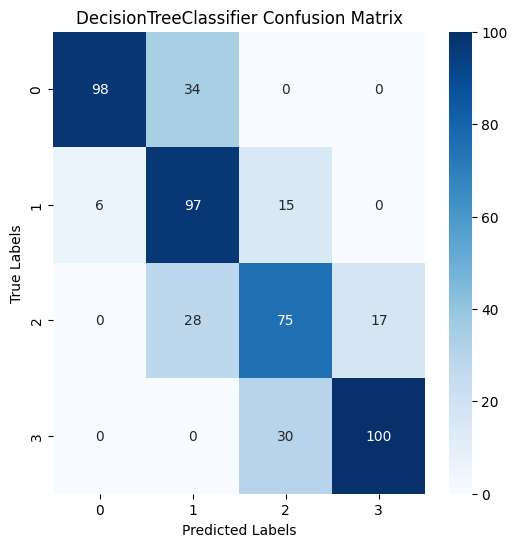

In [25]:
# DecisionTree Confusion Matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='Blues')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [26]:
#  metrics for evaluation
print('\nDecisionTreeClassifier Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_DT))
print('Median Absolute Error:', median_absolute_error(y_test, y_pred_DT))


DecisionTreeClassifier Metrics:
Mean Absolute Error: 0.26
Mean Squared Error: 0.26
Median Absolute Error: 0.0
